In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("wineQT.csv")  
df = df.drop('Id', axis=1)

X = df.drop('quality', axis=1)
y = df['quality']

print("Original shape:", df.shape)
print("Feature names:", X.columns.tolist())
print("Class distribution:\n", y.value_counts())


Original shape: (1143, 12)
Feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Class distribution:
 quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


In [6]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_data, columns=X.columns)


In [7]:

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

pca_columns = [f'PC{i}' for i in range(1, X.shape[1]+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)
pca_df['target'] = y

print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print("\nExplained Variance (Eigen values):\n", pca.explained_variance_)
print("\nPrincipal Axes (components/Eigen Vectors):\n", pca.components_)
print("\nMean of each feature before transformation:\n", pca.mean_)


Explained Variance Ratio:
 [0.28692345 0.17075104 0.14305928 0.1101368  0.08711032 0.06048811
 0.05069067 0.03809625 0.03131763 0.01611195 0.0053145 ]

Explained Variance (Eigen values):
 [3.15892164 1.87990611 1.57503007 1.21256564 0.95905262 0.66595181
 0.55808566 0.41942574 0.34479563 0.17738664 0.05851067]

Principal Axes (components/Eigen Vectors):
 [[ 0.48533856 -0.22714317  0.46007532  0.17450629  0.22487011 -0.04785179
   0.01506861  0.39968417 -0.43284424  0.23755529 -0.11879903]
 [-0.10232799  0.28878641 -0.14650773  0.2522617   0.15313338  0.51702178
   0.57739283  0.21753697 -0.00637351 -0.06228016 -0.38163504]
 [-0.12237612 -0.44371805  0.24684311  0.09135939 -0.05256247  0.42828836
   0.32342387 -0.33423846  0.05992279  0.30276801  0.47020106]
 [-0.23604559  0.07728789 -0.06381775 -0.40726337  0.65266911 -0.05080877
  -0.0466689  -0.16401907 -0.00672433  0.52754686 -0.17995347]
 [-0.09737837  0.25755756 -0.07767357  0.70114127  0.27064882 -0.14928186
  -0.21047961  0.1515

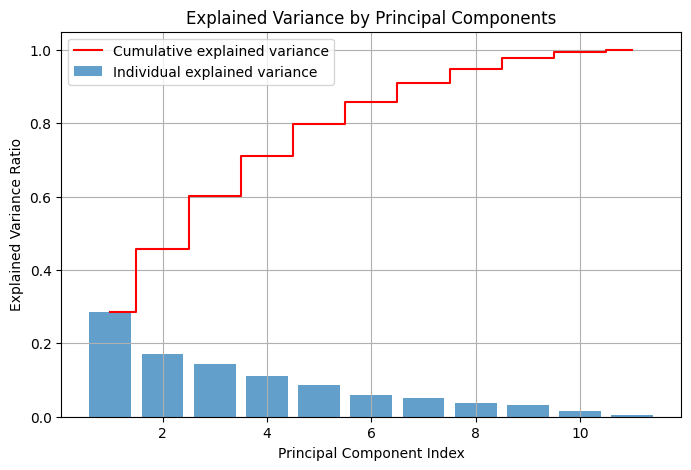

In [8]:

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_var)+1), np.cumsum(explained_var), where='mid', label='Cumulative explained variance', color='red')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()


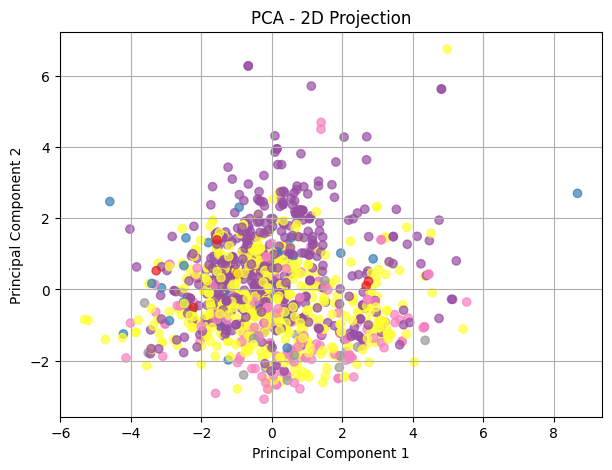

In [9]:

plt.figure(figsize=(7, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, alpha=0.7, cmap='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.grid(True)
plt.show()


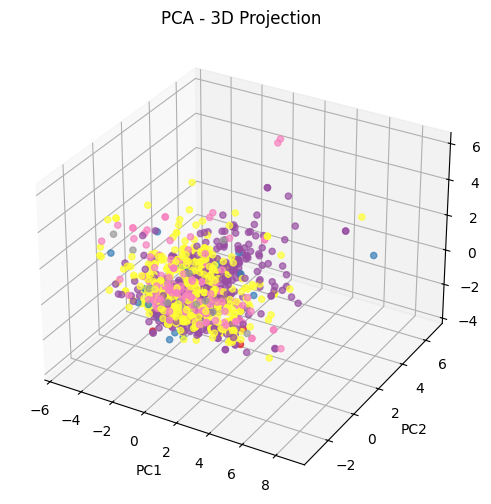

In [10]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=y, cmap='Set1', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - 3D Projection')
plt.show()
